# IBM HR Analytics Employee Attrition & Performance

#### Predicting employee attrition

##### by John Ryan - notebook created using IBM Data Science Experience( https://datascience.ibm.com/)


## Introduction - Predicting Employee Attrition






For more information on the dataset please veiw [here](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset).  

## Table of Contents
1. [Loading Required Packages](## Load required packages)
2. [Preprocessing Data](## Preprocessing Data)
3. [Loading Data](## Loading the Data)
4. [Ensemble Methods - Random Forest](## Random Forest)
5. [Support Vector Machines](## Support Vector Machines)

## Load required packages

In [1]:
import os
import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from sklearn import preprocessing, metrics, svm
from sklearn.metrics import log_loss, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Preprocessing Data

## Loading the Data

In [2]:
data = pd.read_csv("C://data//WA-HR-Employee-Attrition.csv")
data.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


#### Check for missing values

In [3]:
#Print out the number of missing values
print("Number of NA values : {0}".format((data.shape[0] * data.shape[1]) - data.count().sum()))

Number of NA values : 0


#### One hot encoder

In [4]:
#Label encoder tranforms any label or attribute for input to the algorithim 
#we can also see some missing values in the top few rows of the data set these will also
#need to be treated in a suitable mannor.
for feature in data.columns:
    if data[feature].dtype=='object':
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
data.tail(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,0,2,628,1,8,3,3,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
from sklearn import cross_validation
#Assign the target variable to Y for later processing and 
#Remove the ID Column that is not needed 
Y = data.Attrition.values
X = data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=0)

## Random Forest

There are many advantages to applying a tree model with bootstrap aggregation and building each tree from different random subset of features which encourages ensemble diversity and thus reduces training time significantly.

Scaling or transforming the data is not necessary for random forests. This algorithim deals with convergence and numerical precision issues, which can sometimes trip up the algorithms used in logistic and linear regression, as well as neural networks, aren't so important. Because of this, you don't need to transform variables to a common scale like you might with a Neural Net.

#### Create the Random Forest Classification Model

In [11]:
#Create the Random Forest Classification Model
np.random.seed(142)
from sklearn.ensemble import RandomForestClassifier
RFmod = RandomForestClassifier(n_estimators=10, min_samples_split=10, max_depth=10, max_features='auto')
#Prediction on held for testing
RFpredict = RFmod.fit(X_train, y_train).predict(X_test)

### Model Evaluation

#### 1.  Class predictions for the test set
We first make class predictions for the test set by passing X_test, the feature matrix for the testing set to the predict () method for the fitted model.This outputs a class prediction 1 or 0 for every observation in the testing set which is then stored in an object called y_pred_class.

In [12]:
#make class predictions for the test set
#we pass X_test the feature matrix for the testing set to the predict () method 
#for the fitted model
y_predict_class = RFmod.predict(X_test)

#### 2. Classification Accurracy: % of correct predictions

For the test set the accuracy score function can tell us what percentage of the predictions in y_pred_class are correct. Calculate accurracy pass y_test and y_predict_class to the accurracy score function y_test contains true response values for the test set the accuracy score function can tell us what percentage of the predictions in y_pred_class are correct.

In [13]:
# calculate accurracy pass y_test and y_predict_class to the accurracy score function
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_predict_class))

0.995464852608


#### 3. Confusion Matrix

In [14]:
#true values i.e y_test needs to be the first argument otherwise we wont see any errors produced
from sklearn.metrics import confusion_matrix
print (metrics.confusion_matrix(y_test, y_predict_class))

[[371   0]
 [  2  68]]


#### Diagram explaining a Confusion Matrix

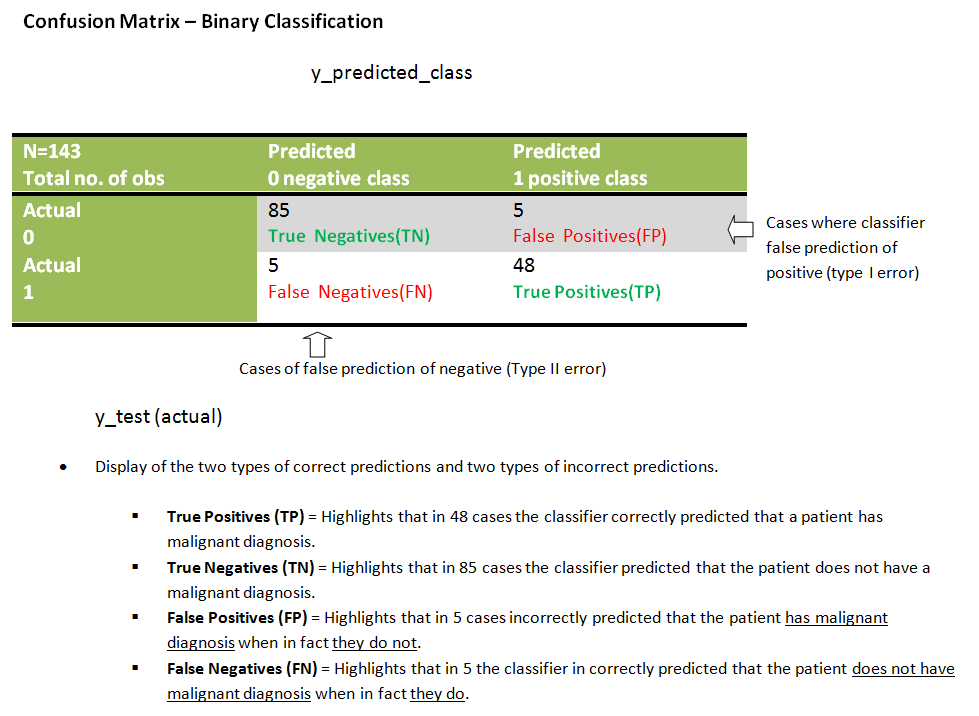

In [16]:
from IPython.display import Image
Image("C:\\data\\CM PSCD.PNG",  width=900, height=600)

#### 3.1 - Confusion Matrix - Classification Accuracy %

In [19]:
#1st way to compute the claasification accuracy for confusion matrix
confusion = metrics.confusion_matrix(y_test,y_predict_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
#classifiaction accuracy score
(TP + TN)/float(TP + TN + FP + FN)

0.99546485260770978

#### 4. Mis - Classification Rate

What has the model mis-classified predictions, This is equal to the False Positive + False Negitive dived by the total observations. See below code for further clarification: 

In [21]:
# add the FP + FN / float(total)
1 - metrics.accuracy_score(y_test, y_predict_class)

0.0045351473922902175

#### 5. Sensitivity (recall) & Specificity

Sensitivity how often is the prediction correct, how sensitive is the classifier to predicting positive instances!

Specificity when the actual value is a negative, how often is the prediction correct? How selective is the model at predicting positive instances.

In [22]:
#Sensitivity (recall) TP / float(TP + FN)
metrics.recall_score(y_test, y_predict_class)

0.97142857142857142